In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import scipy as sp

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

import matplotlib as mpl
import matplotlib.pylab as plt

import seaborn as sns

# Table of Contents
>## 1. What is Dimensionality Reduction?

>## 2. Theoretical Background

>## 3. PCA in `Scikit-Learn`
* 3.1. Example - 2D data
* 3.2. Example - Iris dataset
* 3.3. Example - Image
* 3.4. Example - Boston House Prices

>## 4. How to decide $M$

# 1. What is Dimensionality Reduction?
* **Truncation**: remove some dimensions (make them 0)
* In order to do this, the coordinates should be **rotated** to maximize the variance

<img src="http://www.nlpca.org/fig_pca_principal_component_analysis.png" style="width:90%; margin: 0 auto 0 auto;">


# 2. Theoretical Background
* PCA (Principal Component Analysis)
* PCA uses linear transformation

#### Step 1. We are trying to reduce the dimension from $D$ to $M$


$$ X \in \mathbf{R}^{N \times D} \;\;\; \rightarrow \;\;\; \hat{X} \in \mathbf{R}^{N \times M} $$

#### Step 2. We will use linear transformation
* Vector notation:
$$ \hat{x}_i = W x_i \;\;\;(x \in \mathbf{R}^D,\; W \in \mathbf{R}^{M \times D},\; \hat{x} \in \mathbf{R}^M) $$

* Matrix notation:
$$ \hat{X} = XW^{T} \;\;\;(X \in \mathbf{R}^{N \times D},\; \hat{X} \in \mathbf{R}^{N \times M}, W^T \in \mathbf{R}^{D \times M}) $$

#### Step 3. Our goal is to find $W$ that preserves the most information. In order to do this, we will transform  $\hat{x}_i$ back into a $D$-dim vector.

$$ \hat{\hat{x}} = U \hat{x}  \;\;\;(\hat{x} \in \mathbf{R}^M,\; U \in \mathbf{R}^{D \times M},\; \hat{\hat{x}} \in \mathbf{R}^D) $$

#### Step 4. If we apply dimensionality reduction again for $\hat{\hat{x}}$, it becomes $\hat{x}$

$$ W \hat{\hat{x}} = W U \hat{x} = \hat{x} $$

$$ WU = I $$

#### Step 5. Suppose we know $U$, we can find $\hat{x}$ that resembles the original $x$ the most, using the following optimization.

$$ \arg\min_{\hat{x}} || x - U \hat{x} ||^2 $$




#### Step 6. Transform the objective function

$$
\begin{eqnarray}
|| x - U \hat{x} ||^2 
&=& (x - U \hat{x})^T (x - U \hat{x}) \\
&=& x^Tx - \hat{x}^T U^T {x}  - x^T U \hat{x} + \hat{x}^T U^T U \hat{x} \\
&=& x^Tx - 2 x^T U \hat{x} + \hat{x}^T  \hat{x} \\
\end{eqnarray}
$$

#### Step 7. Differentiate this with $\hat{x}$

$$ - 2 U^Tx + 2\hat{x} = 0$$

$$ \hat{x} = U^Tx $$

#### Step 8. As a result,

$$ \hat{x} = Wx \;\;\;\text{and}\;\;\; \hat{x} = U^Tx $$

$$ U = W^{T} $$

$$ WW^{T} = I $$

#### Step 9. Now, let's find the best $W$, by solving the following optimization
* Vector notation:
$$ \arg\min_{W} \sum_{i=1}^N || x_i - W^{T} W x_i ||^2 $$

* Matrix notation:
$$ \arg\min_{W} || X - X W^{T} W ||^2 $$

#### Step 10. Note that $|| A ||$ is:
$$ || A || = || A ||_F = \sqrt{ \sum_i \sum_j a_{ij}^2 } = \sqrt{ tr (A^TA) } $$

#### Step 11. Think of the case when $M=1$ $\rightarrow$ $W=w^T$ and $w^Tw=1$

$$ 
\arg\min_{W} || X - X W^{T} W ||^2_{F} \\
= \arg\min_{W} || X - X ww^T ||^2_{F} \\
= \arg\min_{W} tr (X - X ww^T)^T(X - X ww^T) \\
= \arg\min_{W} tr (X^T - ww^T X^T)(X - X ww^T) \\
= \arg\min_{W} tr (X^TX - X^T X ww^T - ww^T X^T X + ww^T X^T X ww^T) \\
= \arg\min_{W} -2 tr (X^T X ww^T) + tr(ww^T X^T X ww^T) \\
= \arg\min_{W} -2 tr (X^T X ww^T) + tr(X^T X ww^T ww^T) \\
= \arg\min_{W} -2 tr (X^T X ww^T) + tr(X^T X ww^T) \\
= \arg\min_{W} - tr (X^T X ww^T) \\
= \arg\max_{W} tr (X^T X ww^T) \\
= \arg\max_{W} tr (w^T X^T X w) \\
$$

#### Step 12. Eigencomposition & Diagonalization of $X^TX$ $\rightarrow$ $V^T\Sigma V$

$$
\arg\max_{W} tr (w^T X^T X w) \\
= \arg\max_{W} tr ((Vw)^T\Sigma (Vw))
$$

#### Step 13. In order for this term to be maximized, $w$ should be eigenvector matching the biggest eigenvalue of $X^TX$
* Thus, $W^{\ast}$ can be obtained by doing eigendecomposition of $XX^T$
* If $M>1$, the column of $W^{\ast}$ are the eigenvectors, in decreasing order

# 3. PCA in `Scikit-Learn`
* Use `PCA` class
* Parameters:
  * `n_components`: integer / $M$
* Attributes
  * `components_`: axis of PC
  * `n_components_`: no. of PC
  * `mean_`: mean of each PC
  * `explained_variance_ratio_`: variance ratio of each PC

## 3.1. Example - 2D data

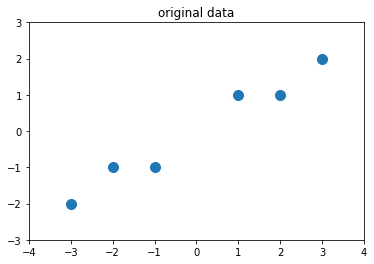

In [31]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
plt.scatter(X[:,0], X[:,1], s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title("original data")
plt.show()

#### PCA without dimensionality reduction

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [5]:
Z = pca.transform(X)
Z

array([[ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385],
       [-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385]])

In [6]:
w, U = np.linalg.eig(pca.get_covariance())

In [7]:
U.T.dot(X.T).T

array([[-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385],
       [ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385]])

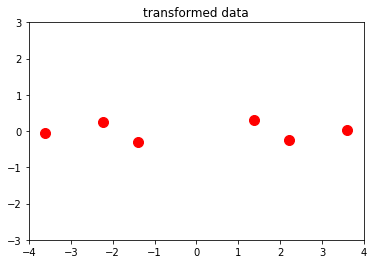

In [8]:
plt.scatter(Z[:,0], Z[:,1], c='r', s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title("transformed data")
plt.show()

#### PCA with dimensionality reduction

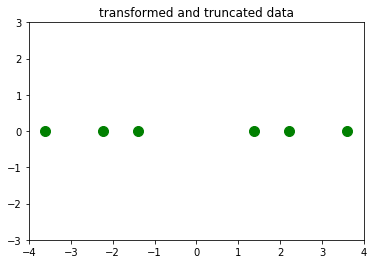

In [9]:
plt.scatter(Z[:,0], np.zeros_like(Z[:,1]), c='g', s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title("transformed and truncated data")
plt.show()

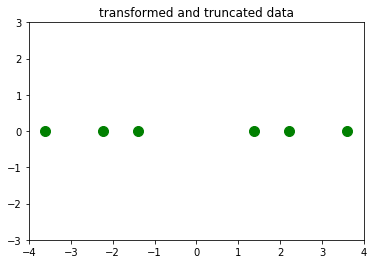

In [10]:
z = PCA(n_components=1).fit_transform(X)

plt.scatter(z, np.zeros_like(z), c='g', s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title("transformed and truncated data")
plt.show()

## 3.2. Example - IRIS dataset

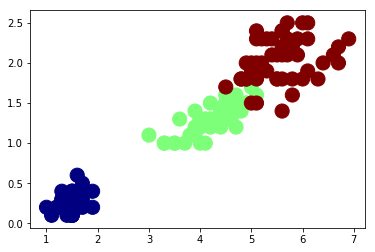

In [32]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, 2:]
plt.scatter(X[:, 0], X[:, 1], c=iris.target, s=200, cmap=plt.cm.jet);

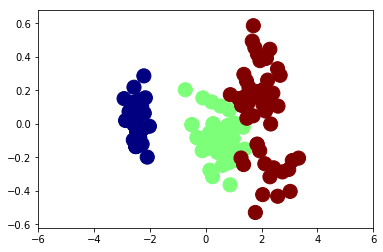

In [12]:
model2 = PCA(2).fit(X)
X2 = model2.transform(X)
plt.scatter(X2[:, 0], X2[:, 1], c=iris.target, s=200, cmap=plt.cm.jet)
plt.xlim(-6, 6)
plt.show()

In [13]:
model2.components_

array([[ 0.92154695,  0.38826694],
       [-0.38826694,  0.92154695]])

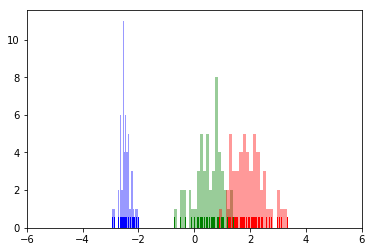

In [14]:
model1 = PCA(1).fit(X)
X1 = model1.transform(X)
sns.distplot(X1[iris.target==0], color="b", bins=20, rug=True, kde=False)
sns.distplot(X1[iris.target==1], color="g", bins=20, rug=True, kde=False)
sns.distplot(X1[iris.target==2], color="r", bins=20, rug=True, kde=False)
plt.xlim(-6, 6)
plt.show()

In [15]:
model1.components_

array([[0.92154695, 0.38826694]])

#### Applying the same technique to the whole data

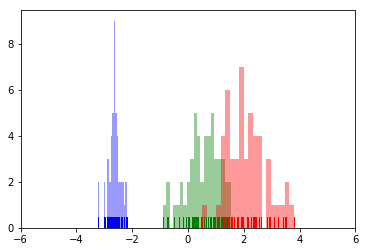

In [16]:
model1 = PCA(1).fit(iris.data)
X1 = model1.transform(iris.data)
sns.distplot(X1[iris.target==0], color="b", bins=20, rug=True, kde=False)
sns.distplot(X1[iris.target==1], color="g", bins=20, rug=True, kde=False)
sns.distplot(X1[iris.target==2], color="r", bins=20, rug=True, kde=False)
plt.xlim(-6, 6)
plt.show()

In [17]:
model1.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393]])

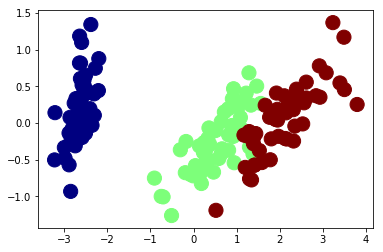

In [18]:
model2 = PCA(2).fit(iris.data)
X2 = model2.fit_transform(iris.data)
plt.scatter(X2[:, 0], X2[:, 1], c=iris.target, s=200, cmap=plt.cm.jet);

In [19]:
model2.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

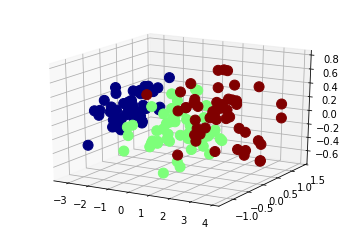

In [20]:
X3 = PCA(3).fit_transform(iris.data)
from mpl_toolkits.mplot3d import Axes3D

def plot_pca(azim):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d');
    ax.scatter(X3[:,0], X3[:,1], X3[:,2], c=iris.target, s=100, cmap=plt.cm.jet, alpha=1)
    ax.view_init(20, azim)

plot_pca(-60)

In [21]:
from ipywidgets import widgets
widgets.interact(plot_pca, azim=widgets.IntSlider(min=0, max=180, step=10, value=0));

interactive(children=(IntSlider(value=0, description='azim', max=180, step=10), Output()), _dom_classes=('widget-interact',))

## 3.3. Image

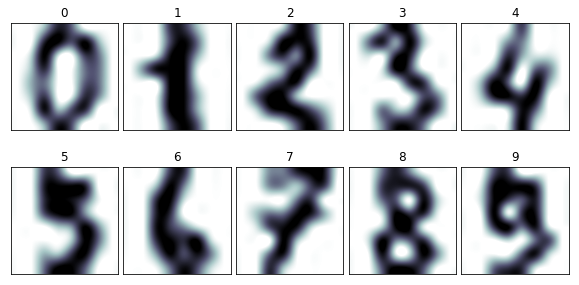

In [22]:
from sklearn.datasets import load_digits
digits = load_digits()
X_digits, y_digits = digits.data, digits.target

N=2; M=5;
fig = plt.figure(figsize=(10, 4))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i*M+j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(digits.images[k], cmap=plt.cm.bone_r, interpolation="spline36")
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(digits.target_names[k])

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_digits)
print(X_digits.shape)
print(X_pca.shape)

(1797, 64)
(1797, 3)


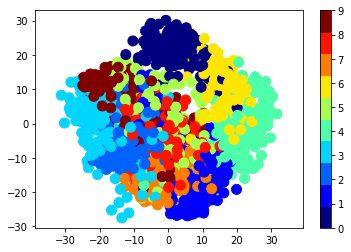

In [24]:
cmap = plt.cm.get_cmap('jet', 10)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_digits, s=100, cmap=cmap)
plt.axis("equal")
plt.colorbar()
plt.show()

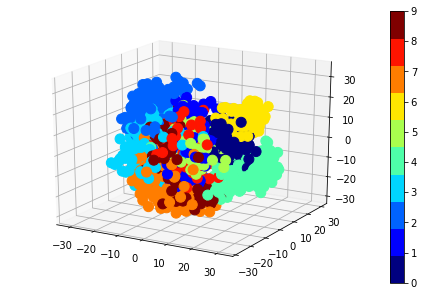

In [25]:
from mpl_toolkits.mplot3d import Axes3D

def plot_pca2(azim):
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(111, projection='3d');
    p = ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=y_digits, s=100, cmap=cmap, alpha=1)
    plt.colorbar(p)
    ax.view_init(20, azim)

plot_pca2(-60)

In [26]:
from ipywidgets import widgets
widgets.interact(plot_pca2, azim=widgets.IntSlider(min=0,max=180,step=10,value=0));

interactive(children=(IntSlider(value=0, description='azim', max=180, step=10), Output()), _dom_classes=('widget-interact',))

## 3.4. Example - Boston House Prices dataset

In [27]:
from sklearn.datasets import load_boston
boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)

from patsy import dmatrix

formula = "scale(CRIM) + scale(ZN) + scale(INDUS) + " + \
    "scale(NOX) + scale(RM) + scale(AGE) + " + \
    "scale(np.log(DIS)) + scale(RAD) + scale(TAX) + " + \
    "scale(np.log(PTRATIO)) + scale(B) + scale(np.log(LSTAT)) + CHAS"
dfX = dmatrix(formula, dfX0, return_type="dataframe")
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

In [28]:
idx_outlier = \
    np.array([  7,  54, 148, 152, 160, 214, 267, 364, 365, 367, 368, 369, 371,
              372, 380, 385, 397, 398, 399, 400, 401, 405, 409, 410, 412, 413,
              415, 416, 418, 419, 426, 466, 489, 490, 492, 495, 505, 161, 162,
              163, 166, 186, 195, 204, 225, 257, 267, 283, 368, 369, 370, 371, 372])
    
idx = list(set(range(len(dfX))).difference(idx_outlier))
dfX = dfX.iloc[idx, :].reset_index(drop=True)
dfy = dfy.iloc[idx, :].reset_index(drop=True)

In [29]:
model_boston1 = sm.OLS(np.log(dfy), dfX)
result_boston1 = model_boston1.fit()
print(result_boston1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     223.9
Date:                Thu, 26 Jul 2018   Prob (F-statistic):          1.49e-185
Time:                        12:56:20   Log-Likelihood:                 302.66
No. Observations:                 458   AIC:                            -577.3
Df Residuals:                     444   BIC:                            -519.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3

In [30]:
dfX2 = sm.add_constant(pd.DataFrame(PCA(n_components=8).fit_transform(dfX)))
model_boston2 = sm.OLS(np.log(dfy), dfX2)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     287.0
Date:                Thu, 26 Jul 2018   Prob (F-statistic):          3.47e-171
Time:                        12:56:20   Log-Likelihood:                 254.16
No. Observations:                 458   AIC:                            -490.3
Df Residuals:                     449   BIC:                            -453.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0391      0.007    463.560      0.0

# 4. How to decide $M$
* Remove the component with the smallest eigenvalue

* Eigenvalues of the covariance matrix $X^TX$
$$ \lambda_1, \lambda_2, \lambda_3, \cdots, \lambda_D $$
$$ \; $$
* Eigenvalues of the covariance matrix $Z^TZ$
$$ \lambda_1,  \cdots, \lambda_L $$
$$ \; $$
* Explained Variance
$$ \dfrac{\lambda_1 +  \cdots + \lambda_L}{\lambda_1 + \lambda_2 + \lambda_3 + \cdots + \lambda_D} < 1$$